# 課題1

In [1]:
#必要なライブラリを読み込む
from PIL import Image
import numpy as np

# npeople = 93  # データセットに含まれる人数の定義
npeople = 99
nimage = 10   #各人の画像枚数の定義

imX = 92  # データベース画像の横画素数
imY = 112 # データベース画像の縦画素数

X  = np.zeros((0,imY*imX))
Xt = np.zeros((0,imY*imX))
Y  = np.array([])
Yt = np.array([])

X_list = X.tolist()

for n in range(npeople):    # 人数分の顔画像についてのループ
    for i in range(nimage): # 各人の顔画像についてのループ
#         img = Image.open('./face/' + str(n + 1) + '/' + str(i + 1) + '.png')    # 画像を読み込む
        if n == 97:
            img = Image.open('./self_face/' + str(n + 1) + '/' + str(i + 1) + '.png')
            img = img.resize((92, 112))
            data = np.array(img.convert('L'))
            data  = data.reshape([-1, imY*imX])
        elif n > 92:
            img = Image.open('./self_face/' + str(n + 1) + '/' + str(i + 1) + '.jpg')
            img = img.resize((92, 112))
            data = np.array(img.convert('L'))
            data  = data.reshape([-1, imY*imX])
        else:
             img = Image.open('./face/' + str(n + 1) + '/' + str(i + 1) + '.png')
             data = np.array(img)                   # 画像をnumpy形式に変換する
             data  = data.reshape([-1, imY*imX])      # "(112 x 92)"の配列を"1x(92x112)"の行ベクトルに変換する
        if (i == 0):                           #  一枚目の画像についての処理(テストデータ)
            Xt = np.append(Xt, data, axis=0)   #行ベクトルを連結する
            Yt = np.hstack((Yt, np.array([n + 1])))        #行ベクトルを連結する
        else:                                  #  二枚目の画像についての処理（トレーニングデータ）
            X_list.append(data)     #行ベクトルを連結する
            Y = np.hstack((Y, np.array([n + 1])))          #行ベクトルを連結する

X = np.asarray(X_list).reshape(-1,imY*imX)

print(X.shape)
print(Xt.shape)
print(Y.shape)
print(Yt.shape)

(891, 10304)
(99, 10304)
(891,)
(99,)


# 課題4

(891, 2)


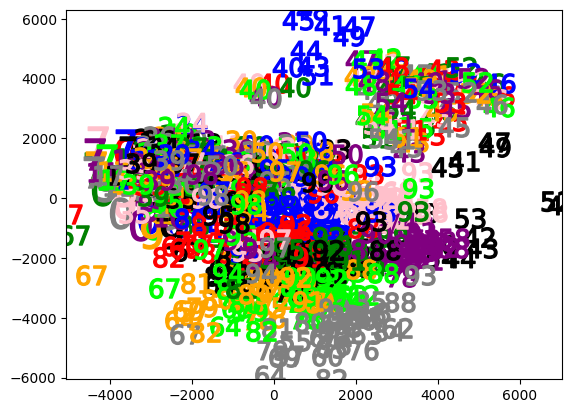

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
feature = pca.transform(X)
print(feature.shape)

colors = ['red', 'green', 'blue', 'pink', 'orange', 'black', 'purple', 'lime', 'gray']
assert len(colors) == 9

import matplotlib.pyplot as plt
plt.xlim(feature[:, 0].min(), feature[:, 0].max())
plt.ylim(feature[:, 1].min(), feature[:, 1].max())
plt.rcParams['figure.figsize'] = (32, 24)
for idx, XX in enumerate(feature):
    pidx = idx // 9
    iidx = idx % 9
#     print(pidx, iidx)
    plt.scatter(XX[0], XX[1], s=500, marker="$" + str(pidx) + "$", color=colors[iidx])
plt.show()

# 課題3

In [7]:
# scikitlearnの必要なライブラリを読み込む
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier を実行する
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute').fit(X, Y)

# テストデータを予測する
Yt_pred = knn.predict(Xt)

# 予測の成功、失敗をカウントする, 予測結果を出力する
# 予測の成功回数を変数 success に，失敗回数を変数 error に代入するプログラムを書くこと
success, error = 0, 0
results = {'success': [], 'error': []}
for i, (t, p) in enumerate(zip(Yt, Yt_pred)):
    if t == p:
        success += 1
        results['success'].append({'index': i, 't': t, 'p': p})
    else:
        error += 1
        results['error'].append({'index': i, 't': t, 'p': p})

assert success + error == 99
print(results['error'])
# 成功回数、失敗回数、認識制度を出力する
print("Success: {}".format(success))
print("Error: {}".format(error))
print("Recognition accuracy = {}/{} = {}".format(success, success + error, success / (success + error)))

[{'index': 34, 't': 35.0, 'p': 40.0}, {'index': 40, 't': 41.0, 'p': 54.0}, {'index': 42, 't': 43.0, 'p': 53.0}, {'index': 45, 't': 46.0, 'p': 43.0}, {'index': 46, 't': 47.0, 'p': 46.0}, {'index': 54, 't': 55.0, 'p': 52.0}]
Success: 93
Error: 6
Recognition accuracy = 93/99 = 0.9393939393939394


# 課題5

In [4]:
max_acc = 0
max_k = 0
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute').fit(X, Y)
    Yt_pred = knn.predict(Xt)
    success, error = 0, 0
    for t, p in zip(Yt, Yt_pred):
        if t == p:
            success += 1
        else:
            error += 1
    k = i if max_acc < success / (success + error) else max_k
    max_acc = max(max_acc, success / (success + error))
    assert success + error == 99
    print(f'\nk={i}')
    print("Success: {}".format(success))
    print("Error: {}".format(error))
    print("Recognition accuracy = {}/{} = {}".format(success, success + error, success / (success + error)))
print(f'\nmax_idx: {k}, max_acc: {max_acc}')
    


k=1
Success: 93
Error: 6
Recognition accuracy = 93/99 = 0.9393939393939394

k=2
Success: 91
Error: 8
Recognition accuracy = 91/99 = 0.9191919191919192

k=3
Success: 92
Error: 7
Recognition accuracy = 92/99 = 0.9292929292929293

k=4
Success: 88
Error: 11
Recognition accuracy = 88/99 = 0.8888888888888888

k=5
Success: 89
Error: 10
Recognition accuracy = 89/99 = 0.898989898989899

k=6
Success: 88
Error: 11
Recognition accuracy = 88/99 = 0.8888888888888888

k=7
Success: 87
Error: 12
Recognition accuracy = 87/99 = 0.8787878787878788

k=8
Success: 87
Error: 12
Recognition accuracy = 87/99 = 0.8787878787878788

k=9
Success: 85
Error: 14
Recognition accuracy = 85/99 = 0.8585858585858586

k=10
Success: 85
Error: 14
Recognition accuracy = 85/99 = 0.8585858585858586

max_idx: 0, max_acc: 0.9393939393939394
